In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns

In [2]:
df= pd.read_csv('amazonreviews.tsv', sep='\t', dtype=str)

In [3]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [4]:
df.dropna(inplace=True)
blanks = [] 
for i,lb,rv in df.itertuples():  
    if type(rv)==str:            
        if rv.isspace():        
            blanks.append(i)             
df.drop(blanks, inplace=True)

In [5]:
X=df['review']
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 69)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from nltk.stem.snowball import SnowballStemmer
from string import punctuation
from textblob import TextBlob
import re

In [7]:
model = Pipeline([('tfidf', TfidfVectorizer(lowercase=False)),( 'clf', RandomForestClassifier(n_estimators=150, 
                             max_depth=150,
                             random_state=42))])
model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=False)),
                ('clf',
                 RandomForestClassifier(max_depth=150, n_estimators=150,
                                        random_state=42))])

In [8]:
import joblib

In [16]:
import flask

In [9]:
joblib.dump(model, "ranfor.pkl")

['ranfor.pkl']

In [14]:
model.predict(["it is terrible","best"])[0]

'neg'

In [9]:
predictions= model.predict(X_test)
report = classification_report(y_test,predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("red", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
neg,0.790000,0.870000,0.830000,1663.000000
pos,0.850000,0.770000,0.810000,1637.000000
accuracy,0.820000,0.820000,0.820000,0.820000
macro avg,0.820000,0.820000,0.820000,3300.000000
weighted avg,0.820000,0.820000,0.820000,3300.000000


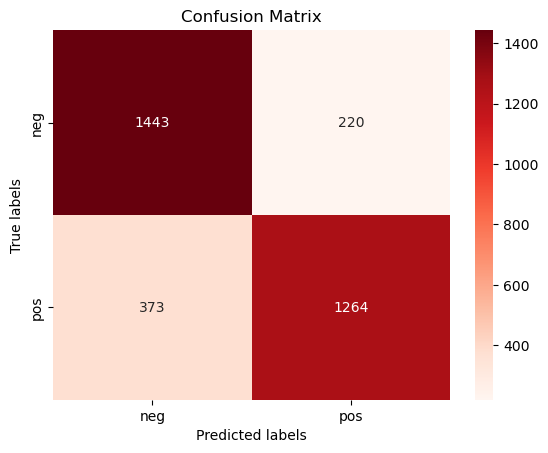

In [10]:
predictions=model.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
ax= plt.subplot()
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['neg', 'pos']); ax.yaxis.set_ticklabels(['neg', 'pos']);

In [17]:
my_model=Pipeline([('tfidf', TfidfVectorizer()),('classifier',SVC(kernel='poly', degree=3))])
my_model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(kernel='poly'))])

In [18]:
predictions= my_model.predict(X_test)
report = classification_report(y_test,predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("red", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
neg,0.820000,0.880000,0.850000,1663.000000
pos,0.870000,0.810000,0.840000,1637.000000
accuracy,0.840000,0.840000,0.840000,0.840000
macro avg,0.850000,0.840000,0.840000,3300.000000
weighted avg,0.850000,0.840000,0.840000,3300.000000


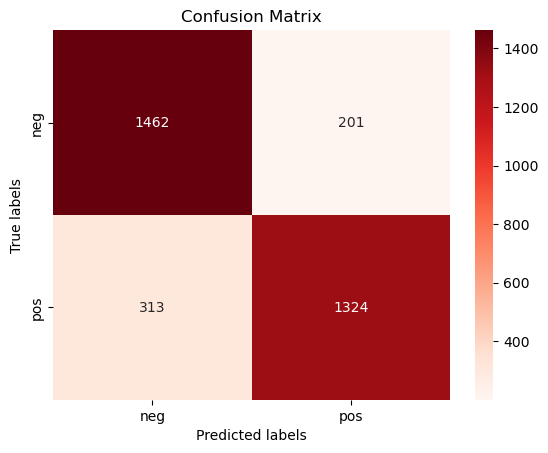

In [19]:
predictions=my_model.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
ax= plt.subplot()
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['neg', 'pos']); ax.yaxis.set_ticklabels(['neg', 'pos']);

In [39]:
smodel=Pipeline([('tfidf', TfidfVectorizer()),('classifier',SVC(kernel='rbf' , C=10, gamma=0.1))])
smodel.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=10, gamma=0.1))])

In [40]:
predictions= smodel.predict(X_test)
report = classification_report(y_test,predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("red", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
neg,0.860000,0.880000,0.870000,1663.000000
pos,0.870000,0.860000,0.870000,1637.000000
accuracy,0.870000,0.870000,0.870000,0.870000
macro avg,0.870000,0.870000,0.870000,3300.000000
weighted avg,0.870000,0.870000,0.870000,3300.000000


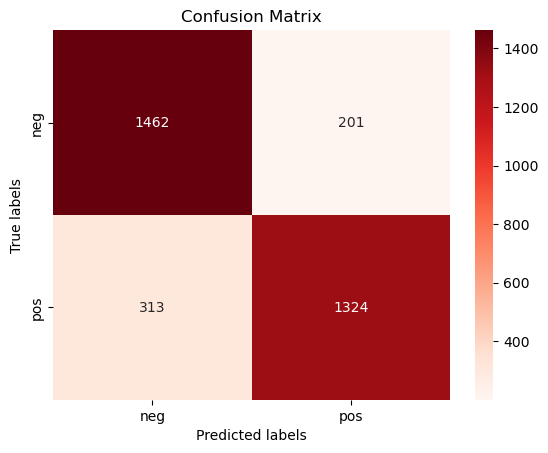

In [22]:
predictions=my_model.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
ax= plt.subplot()
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['neg', 'pos']); ax.yaxis.set_ticklabels(['neg', 'pos']);

In [23]:
mmodel=Pipeline([('tfidf', TfidfVectorizer()),('classifier',SVC(kernel='sigmoid'))])
mmodel.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(kernel='sigmoid'))])

In [24]:
predictions= mmodel.predict(X_test)
report = classification_report(y_test,predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("red", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
neg,0.870000,0.890000,0.880000,1663.000000
pos,0.880000,0.860000,0.870000,1637.000000
accuracy,0.880000,0.880000,0.880000,0.880000
macro avg,0.880000,0.880000,0.880000,3300.000000
weighted avg,0.880000,0.880000,0.880000,3300.000000
